# Demonstration to Convert Anisotropy (Spherical Harmonics) from GEO to GSE coordinate system

In [1]:
from pathlib import Path

In [2]:
import sys
sys.path.append(str(Path().resolve()))

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import pyshtools as pysh

In [6]:
from matplotlib import pyplot as plt

In [9]:
from my_modules import spherical_harmonics as sh

### Make a DataFrame for demonstration.
#### "XC.n.m" represent a cosine component in the expansion coefficients of the (n,m) order spherical harmonics. "XS.n.m" is a sine component.
#### Here we preset magnitude = 1 for each zonal component (m = 0) in GEO coordinate system  (x-axis is fixed to 0h LT) for demonstration.

In [10]:
times = ['2022-02-05','2022-03-20','2022-05-05','2022-06-20','2022-08-05','2022-09-20','2022-11-05','2022-12-20','2023-02-05']
times = list(map(pd.to_datetime, times))
nt = len(times)
keys = ['XC.0.0','XC.1.0','XC.1.1','XS.1.1','XC.2.0','XC.2.1','XS.2.1','XC.2.2','XS.2.2']
dict_xc = {}
for key in keys:
    dict_xc[key] = [0]*nt
dict_xc['XC.1.0'] = [1]*nt
dict_xc['XC.2.0'] = [1]*nt

In [11]:
data_geo = pd.DataFrame(dict_xc, index=times)
data_geo

,XC.0.0,XC.1.0,XC.1.1,XS.1.1,XC.2.0,XC.2.1,XS.2.1,XC.2.2,XS.2.2
2022-02-05,0,1,0,0,1,0,0,0,0
2022-03-20,0,1,0,0,1,0,0,0,0
2022-05-05,0,1,0,0,1,0,0,0,0
2022-06-20,0,1,0,0,1,0,0,0,0
2022-08-05,0,1,0,0,1,0,0,0,0
2022-09-20,0,1,0,0,1,0,0,0,0
2022-11-05,0,1,0,0,1,0,0,0,0
2022-12-20,0,1,0,0,1,0,0,0,0
2023-02-05,0,1,0,0,1,0,0,0,0


### Convert coordinate system.

In [12]:
data_gse =sh.geo_to_gse(data_geo)

make input data
transformation
INFO: Pandarallel will run on 12 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


Finished!


### Result of the harmonics components in GSE coordinate system.
#### The 1st and 2nd harmonics anisotropy constant in GEO cause an annual and biannual variations in GSE respectively.

In [13]:
data_gse

,XC.1.0,XC.1.1,XS.1.1,XC.2.0,XC.2.1,XS.2.1,XC.2.2,XS.2.2,XC.0.0
2022-02-05,0.917502,-0.275520,0.286843,0.762715,-0.437845,0.455839,-0.005515,-0.136885,0
2022-03-20,0.917502,-0.004433,0.397706,0.762715,-0.007045,0.632019,-0.136962,-0.003054,0
2022-05-05,0.917502,0.278759,0.283695,0.762716,0.442992,0.450838,-0.002405,0.136975,0
2022-06-20,0.917502,0.397624,0.009173,0.762716,0.631889,0.014577,0.136850,0.006317,0
2022-08-05,0.917503,0.292845,-0.269130,0.762716,0.465377,-0.427691,0.011542,-0.136509,0
2022-09-20,0.917503,0.020639,-0.397194,0.762717,0.032799,-0.631205,-0.136258,-0.014199,0
2022-11-05,0.917503,-0.268950,-0.293009,0.762717,-0.427405,-0.465639,-0.011709,0.136494,0
2022-12-20,0.917503,-0.397502,-0.013430,0.762717,-0.631695,-0.021342,0.136683,0.009246,0
2023-02-05,0.917503,-0.276748,0.285655,0.762718,-0.439797,0.453952,-0.004338,-0.136926,0


<Axes: ylabel='Harmonics components in GSE'>

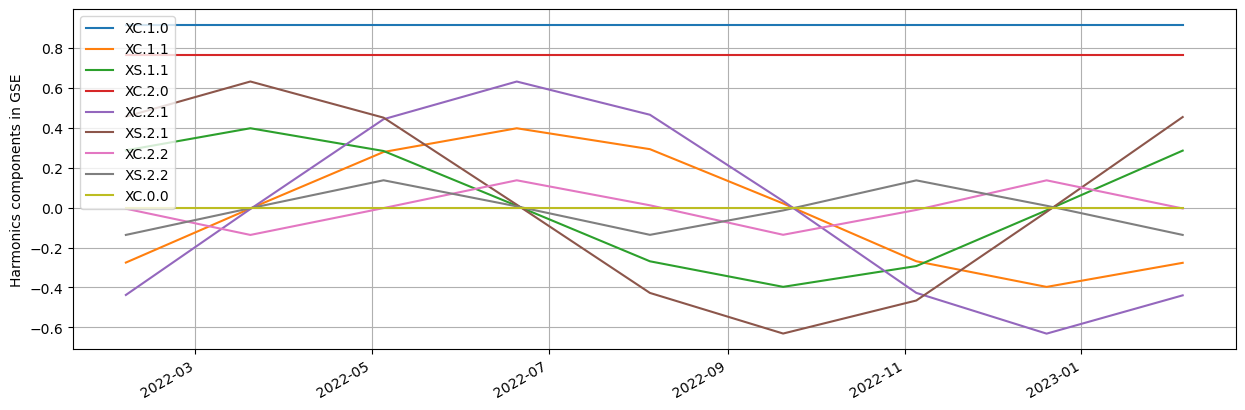

In [14]:
data_gse.plot(figsize=(15,5), ylabel='Harmonics components in GSE' ,grid=True)

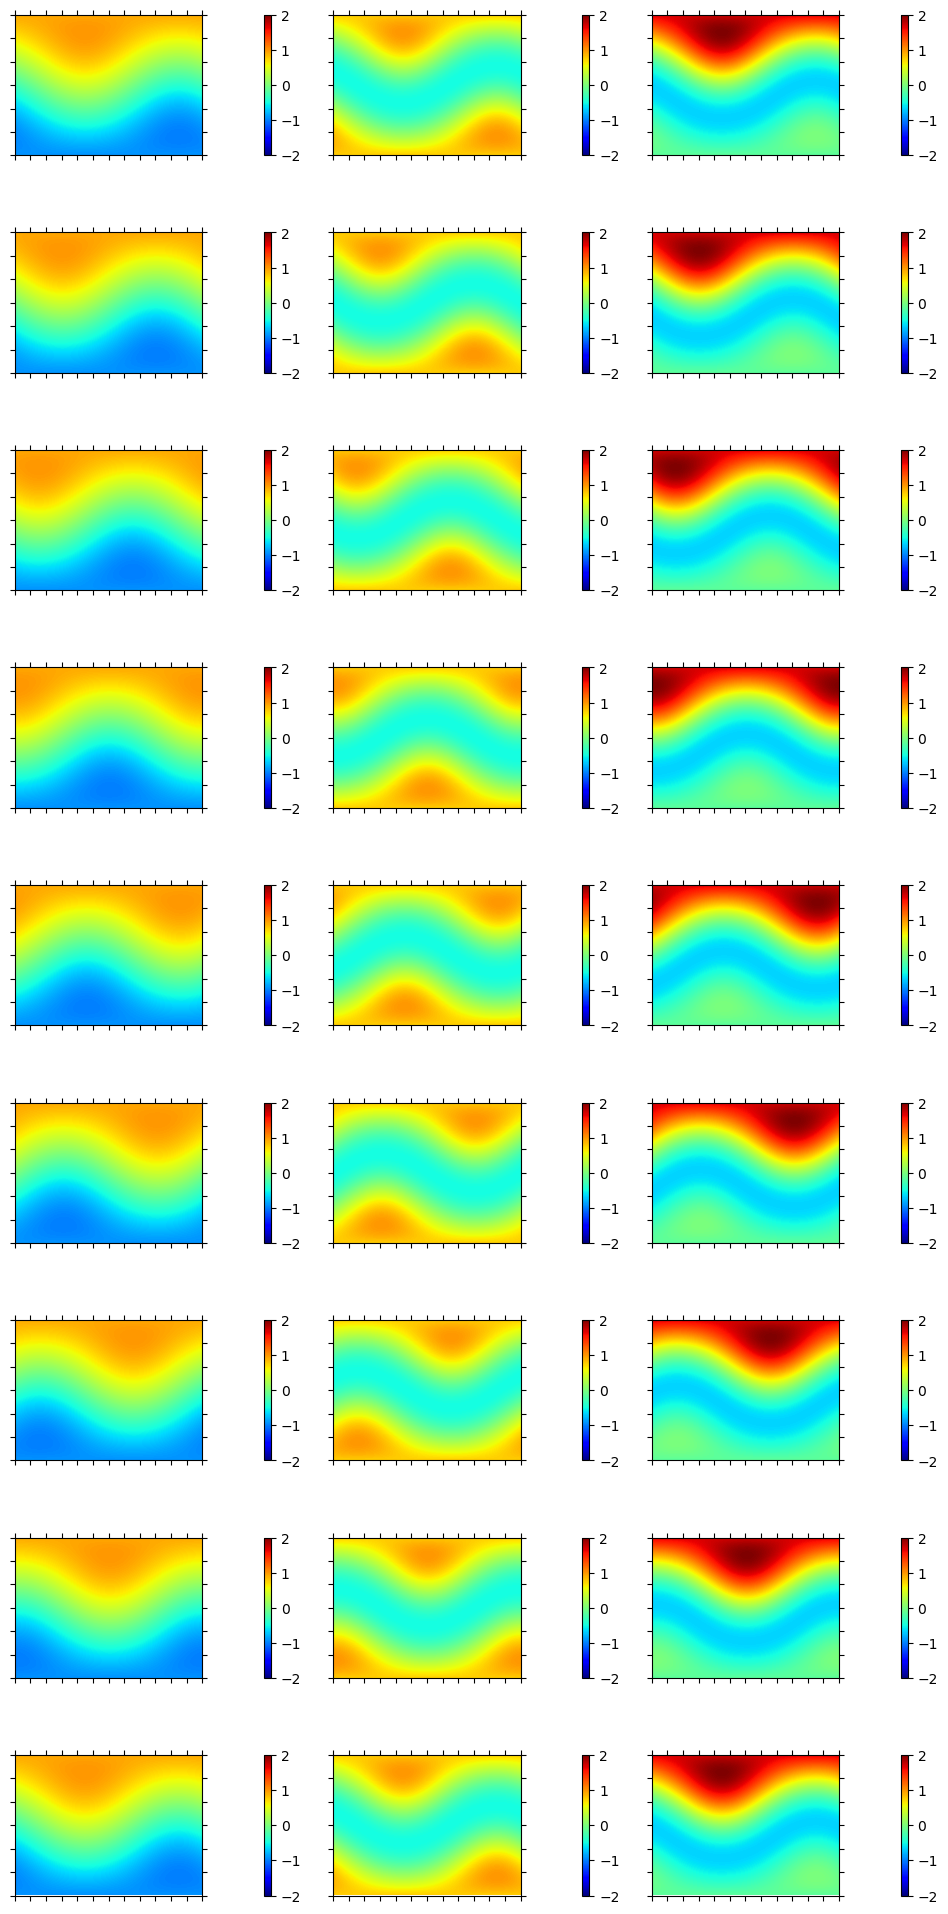

In [18]:
fig, axs = plt.subplots(nrows=len(data_gse), ncols=3, figsize=(10,20), tight_layout=True)
orders = [[1], [2], [1,2]]

for j, order in enumerate(orders):
    for i, (date, data_map) in enumerate(data_gse.iterrows()):
        array_sh = np.zeros((2, 3, 3))
        ax = axs[i, j]
        
        for name, val in data_map.items():
            n = int(name.split('.')[1])
            m = int(name.split('.')[2])
            if not n in order:
                continue

            i = 0 if name.startswith('XC.') else 1 if name.startswith('XS.') else -1
            if i<0:
                continue
            array_sh[i,n,m] = val

        coef_sh = pysh.SHCoeffs.from_array(array_sh, normalization='schmidt')
        grid_sh = coef_sh.expand(lmax=899)

        grid_sh.plot(cmap='jet', cmap_limits=(-2,2), colorbar='right', ax=ax)
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect(1.5)
plt.show()